<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/Supervisadoipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio

In [8]:
# Import necessary modules
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
# Create feature and target arrays
X = digits.data 
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

Inside the for loop:
Setup a k-NN classifier with the number of neighbors equal to k.
Fit the classifier with k neighbors to the training data.
Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = ____

    # Fit the classifier to the training data
    ____
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(____, ____)

    #Compute accuracy on the testing set
    test_accuracy[i] = ____(____, ____)


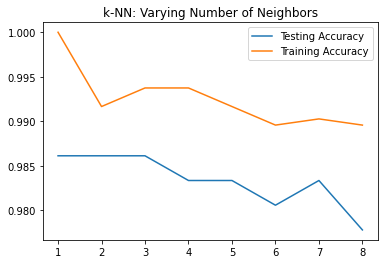

In [9]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] =  knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()


# Regresión

Importing data for supervised learning
In this chapter, you will work with [Gapminder](https://www.gapminder.org/data/) data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .`reshape()` method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

Import numpy and pandas as their standard aliases.
Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
Create array X for the 'fertility' feature and array y for the 'life' target variable.
Reshape the arrays by using the .reshape() method and passing in -1 and 1.

Use import x as y to import x as the alias y.
To read in the CSV file 'gapminder.csv', pass it in as an argument to pd.read_csv().
To create the arrays, first select the column using df['column_name'] and then access its .values attribute.
Use .reshape(-1, 1) on X and y to reshape them.

In [0]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = ____

# Create arrays for features and target variable
y = ____
X = ____

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = ____
X = ____

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

In [8]:
!pip install gapminder

In [10]:
from gapminder import gapminder
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [6]:
# Import numpy and pandas
from gapminder import gapminder
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('http://www.makemeanalyst.com/python-data-science/gapminder.csv')


df.describe()
# Create arrays for features and target variable
y = df['life'].values
#X = df.drop('fertility',axis=1).values 
X=df['fertility'].values
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

ModuleNotFoundError: ignored

Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is not true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!

Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

Import LinearRegression from sklearn.linear_model.
Create a LinearRegression regressor called reg.
Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
Compute and print the R2 score using the .score() method.
Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

In [0]:
# Import LinearRegression
____

# Create the regressor: reg
reg = ____

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
____

# Compute predictions over the prediction space: y_pred
y_pred = ____

# Print R^2 
print(reg.score(____, ____))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


You can import x from y using the command from y import x.
Use the function LinearRegression() to create the regressor.
Use the .fit() method on reg with X_fertility and y as arguments to fit the model.
Use the .predict() method on reg with prediction_space as the argument to compute the predictions.
Use the .score() method with X_fertility and y as arguments to compute the  R2  score.

In [0]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space) 

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
Compute and print the R2 score using the .score() method on the test set.
Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

In [0]:
# Import necessary modules
____
____
____

# Create training and test sets
X_train, X_test, y_train, y_test = ____(____, ____, test_size = ____, random_state=____)

# Create the regressor: reg_all
reg_all = ____

# Fit the regressor to the training data
____

# Predict on the test data: y_pred
y_pred = ____

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(____)
print("Root Mean Squared Error: {}".format(rmse))


In [0]:
# Import necessary modules
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error   
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


## cross-hold validation

5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

Instructions
100 XP
Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Create a linear regression regressor called reg.
Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

In [0]:
# Import the necessary modules
____
____

# Create a linear regression object: reg
reg = ____

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = ____

# Print the 5-fold cross-validation scores
print(____)

print("Average 5-Fold CV Score: {}".format(____(____)))


In [0]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

 
Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Create a linear regression regressor called reg.
Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [0]:
# Import necessary modules
____
____

# Create a linear regression object: reg
reg = ____

# Perform 3-fold CV
cvscores_3 = ____
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = ____
print(np.mean(cvscores_10))


In [0]:
# Import necessary modules
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
# %timeit cross_val_score(reg,X,y,cv=3)
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
# %timeit cross_val_score(reg,X,y,cv=10)
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))


## Regularization I: Lasso
In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

---
Import Lasso from sklearn.linear_model.
Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
Fit the regressor to the data and compute the coefficients using the coef_ attribute.
Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!

In [0]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = ____

# Fit the regressor to the data
____

# Compute and print the coefficients
lasso_coef = ____
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


In [0]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


## Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [0]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

Instructions
 
Instantiate a Ridge regressor and specify normalize=True.
Inside the for loop:
Specify the alpha value for the regressor to use.
Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
Use the display_plot() function to visualize the scores and standard deviations.

In [0]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = ____

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = ____
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = ____
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(____(____))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(____(____))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [0]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
print(alpha_space)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores =  cross_val_score(ridge, X, y, cv=10) 
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
